# Weather Changes Over Time (Consuming APIs)

## Task
Utilize the following two APIs to evaluate the changes in temperature for your birthday and city you were born in:
* [geocode.xyz](geocode.xyz)
* [open-meteo.com](open-meteo.com)


In [1]:
from datetime import date, datetime, timedelta

import requests
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline

sns.set_palette('muted')
sns.set_style('white')

## Question 1: Geocoding A Location

> Indented block


Write a function that utilizes the [geocode.xyz](geocode.xyz) API to take in a city and country and return the latitude and longitude of that location

```
def geocode_location(city, country):
    # your code
    return latitude, longitude
```

For example:
```
geocode_location("london", "united kingdom")
```
should return
```
(-0.11534, 51.49742)
```

In [2]:
# write your solution here
def geocode_location(city, country):
    url = f"https://geocode.xyz/?locate={city},{country}&geoit=JSON" 
    r = requests.get(url)
    jsonR = r.json()
    latitude = jsonR['latt']
    longitude = jsonR['longt']
    return latitude, longitude

(Latitude, Longitude) = geocode_location('Phoenix', 'Arizona')
print(f'{(Latitude, Longitude)}')

('33.54118', '-112.10042')


## Question 2: Determining Weather Using Date and Location
Write a function that utilizes the [open-meteo.com](https://open-meteo.com/) API to take in a date and location and return the 15-day average high and low for the following measurements from the years 1960 to 2022:
* `precipitation_sum` (mm): Sum of daily precipitation (including rain, showers and snowfall)
* `temperature_2m_max` (°F): Maximum daily air temperature at 2 meters above ground
* `temperature_2m_min` (°F): Minimum daily air temperature at 2 meters above ground
* `apparent_temperature_max` (°F): Maximum daily apparent temperature
* `apparent_temperature_min` (°F): Min daily apparent temperature

The function should return the above measurements in a dictionary object with the keys being `"precipitation_sum"`, `"temperature_2m_max"`, etc. and the values being the 15-day average of the measurements. The 15-day average should be the 7 days preceeding the input date, the input date, and the 7 days following the input date. This will give the results more statistical validity by increasing the number of samples for each measurement.

The `get_historical_weather_measurements()` function will include a few different sub-tasks:

### Create API Request in Postman/Insomnia
Use the following [API Documentation](https://open-meteo.com/en/docs/historical-weather-api#api-documentation) page to create an API request that responds with a JSON object of the measurements listed above. Make sure the response object meets the following:
* Temperatue measurements are in Fahrenheit
* Precipitation measurements are in inches
* Measurements are daily aggregations
* 15 day range of weather
* JSON format

Before writing any code, use Postman/Insomnia to create the API request and take a screenshot of the request/response.

#### HINT: How to insert a screenshot
1. Take a screenshot and save it to a file.
2. Create a markdown cell in your notebook.
3. Insert the image into the markdown cell.
  * Option 1: Drag the image file into the markdown cell. This embeds the image data directly into your Jupyter notebook.
  * Option 2: Move the file into the directory with your notebook file (inside the project folder that you will submit). Add markdown to insert the image: `![alternative text](path-to-image)`

### Create API Request Function
Convert the request above into a function. The function should take in `latitude`, `longitude`, and `date` as its arguments and return the API response, if successful.

```
def get_api_response(latitude, longitude, date):
    # your code

```

Use the helper function below for creating a 15-day date range

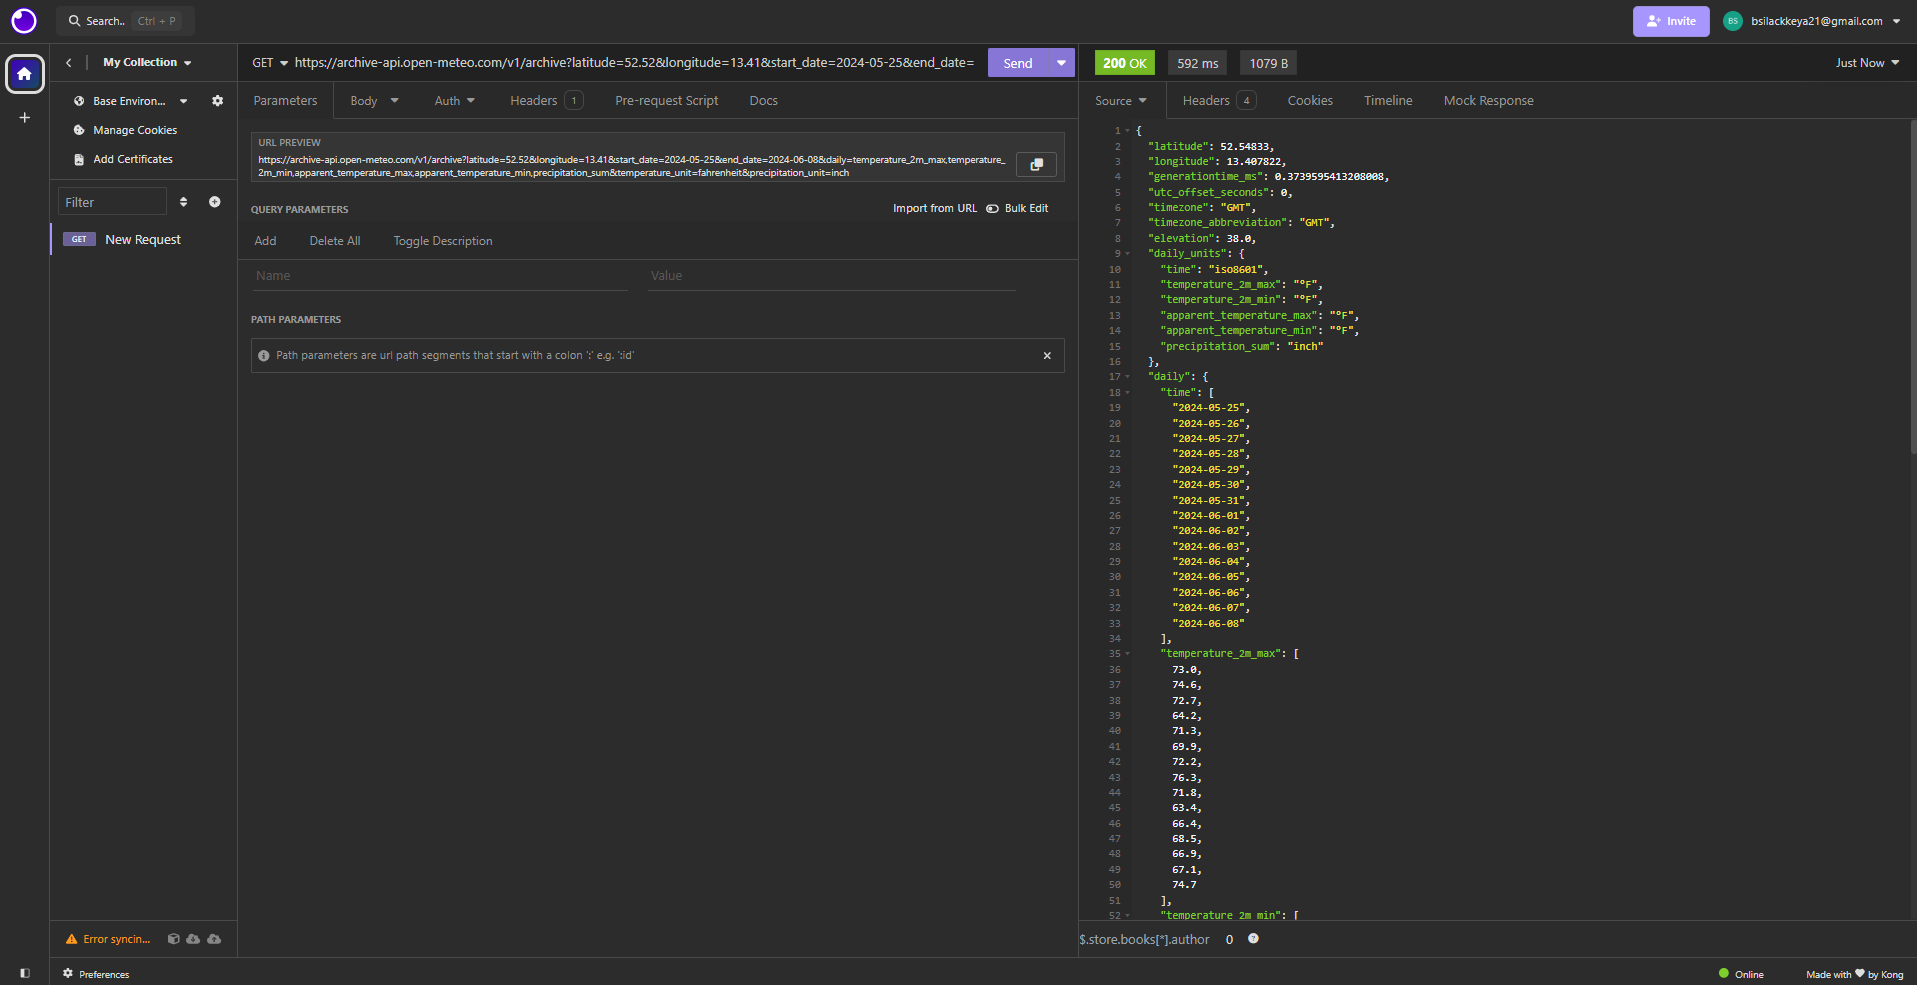

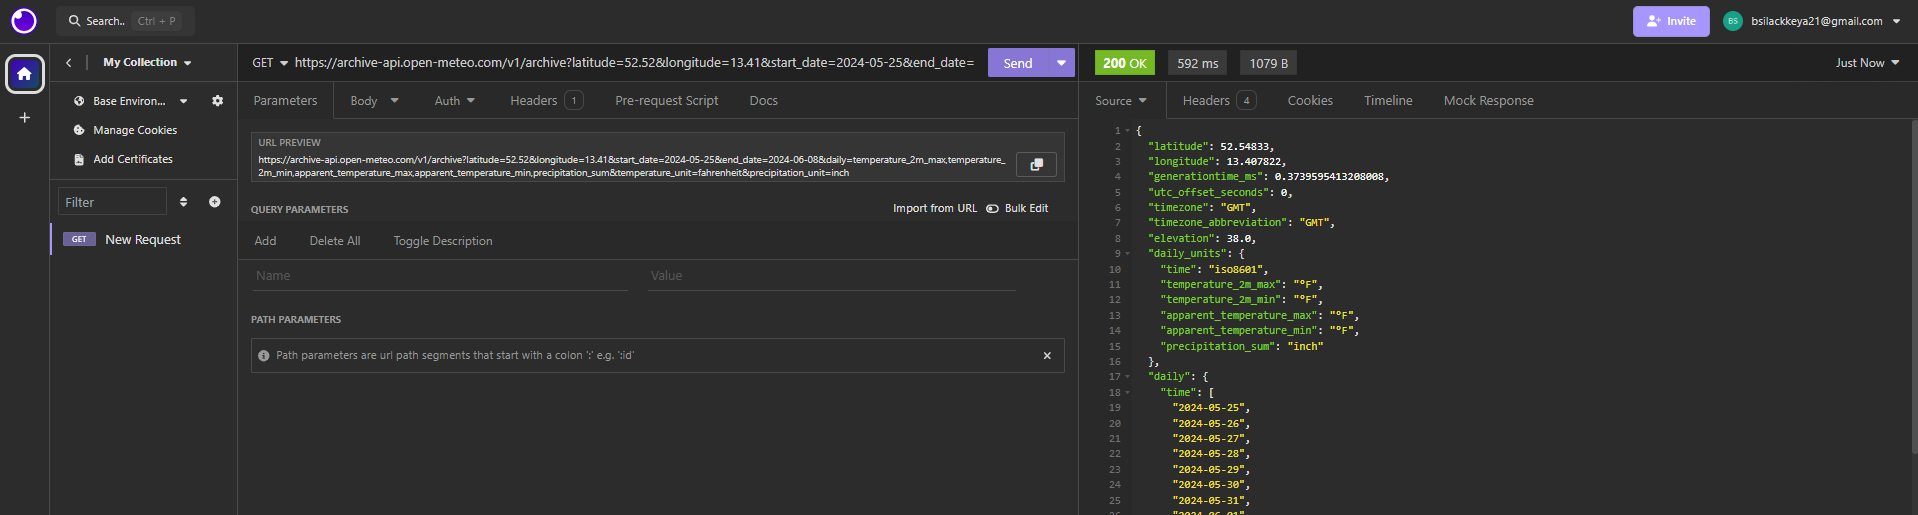

In [3]:
# helper function for 15-day date range
def get_date_range(birthday):
    return {'start_date': birthday - timedelta(days=7),
            'end_date': birthday + timedelta(days=7)
           }

In [4]:
# write your solution here
def get_api_response(latitude, longitude, date):
    date = datetime.strptime(date, '%m-%d-%Y').date()
    days = get_date_range(date)
    url = f'''https://archive-api.open-meteo.com/v1/archive?latitude={latitude}&longitude={longitude}&start_date={days['start_date']}&end_date={days['end_date']}&daily=temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum&temperature_unit=fahrenheit&precipitation_unit=inch'''
    r = requests.get(url)
    jsonR = r.json()
    return jsonR

In [5]:
response = get_api_response(Latitude, Longitude, '08-21-1999')

In [6]:
def get_historical_weather_measurement(response):
    return f'''['days': {response['daily']['time']},
'precipitation_sum (inch)' : {response['daily']['precipitation_sum']},
'temperature_2m_max (°F)' : {response['daily']['temperature_2m_max']},
'temperature_2m_min (°F)' : {response['daily']['temperature_2m_min']},
'apparent_temperature_max (°F)' : {response['daily']['apparent_temperature_max']},
'apparent_temperature_min (°F)': {response['daily']['apparent_temperature_min']}] '''

get_historical_weather_measurement(response)

"['days': ['1999-08-14', '1999-08-15', '1999-08-16', '1999-08-17', '1999-08-18', '1999-08-19', '1999-08-20', '1999-08-21', '1999-08-22', '1999-08-23', '1999-08-24', '1999-08-25', '1999-08-26', '1999-08-27', '1999-08-28'],\n'precipitation_sum (inch)' : [0.0, 0.0, 0.0, 0.02, 0.0, 0.008, 0.0, 0.016, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],\n'temperature_2m_max (°F)' : [105.3, 101.4, 104.1, 106.9, 108.4, 107.7, 105.5, 107.1, 109.1, 108.8, 108.2, 108.1, 106.8, 105.0, 99.2],\n'temperature_2m_min (°F)' : [81.2, 81.6, 81.5, 79.2, 80.2, 83.8, 85.2, 82.4, 81.0, 79.2, 82.2, 83.0, 83.1, 85.5, 82.8],\n'apparent_temperature_max (°F)' : [100.7, 105.3, 108.0, 108.5, 108.5, 108.3, 108.2, 109.2, 110.7, 109.3, 110.2, 109.2, 109.1, 107.2, 104.3],\n'apparent_temperature_min (°F)': [79.1, 82.5, 86.4, 82.0, 79.4, 84.1, 89.2, 86.5, 79.2, 79.3, 82.7, 81.9, 85.1, 91.6, 91.6]] "

### Iterating Over Each Year
Write a function that iterates through each year between 1960 and 2022 and returns the corresponding JSON response objects containing weather data for each year in a python list.

```
def get_all_response_objects(start_year, end_year):
    # your code
```


In [7]:
# write your solution here
def get_all_response_objects(start_year, end_year):
    weather_info = []
    for i in range(start_year, end_year):
        if i == end_year:
            break
        else:
            response = get_api_response(Latitude, Longitude, f'08-21-{i}')
            weather_info.append(response)
            
    return weather_info


weather_data = get_all_response_objects(1960, 2023)

### Parse JSON Responses & Aggregate Data
Write a function that takes the list of JSON response objects from the previous function in as a parameter and returns a pandas DataFrame containing the original input date, the measurements, and the average across the 15 days.
```
def parse_json_response(responses):
    # your code
```


In [8]:
# write your solution here
def parse_json_response(responses):
    Date = ['1960-08-21','1961-08-21','1962-08-21','1963-08-21','1964-08-21','1965-08-21','1966-08-21','1967-08-21','1968-08-21',
            '1969-08-21','1970-08-21','1971-08-21','1972-08-21','1973-08-21','1974-08-21','1975-08-21','1976-08-21','1977-08-21',
            '1978-08-21','1979-08-21','1980-08-21','1981-08-21','1982-08-21','1983-08-21', '1984-08-21','1985-08-21','1986-08-21',
            '1987-08-21','1988-08-21','1989-08-21','1990-08-21','1991-08-21','1992-08-21','1993-08-21','1994-08-21','1995-08-21',
            '1996-08-21','1997-08-21','1998-08-21','1999-08-21','2000-08-21','2001-08-21','2002-08-21','2003-08-21','2004-08-21',
            '2005-08-21','2006-08-21','2007-08-21','2008-08-21','2009-08-21','2010-08-21','2011-08-21','2012-08-21','2013-08-21',
            '2014-08-21','2015-08-21','2016-08-21','2017-08-21','2018-08-21','2019-08-21','2020-08-21','2021-08-21','2022-08-21']
    df1 = pd.DataFrame({'Date': Date})
    #normalizing json objects to dataframe
    df2 = pd.json_normalize(weather_data)
    df3 = df2.drop(['latitude','longitude', 'generationtime_ms',	'utc_offset_seconds','timezone',	'timezone_abbreviation','elevation',	
             'daily_units.time','daily_units.temperature_2m_max','daily_units.temperature_2m_min','daily_units.apparent_temperature_max','daily_units.apparent_temperature_min',	'daily_units.precipitation_sum', 'daily.time'], axis = 1)
    df4 = df3.explode(['daily.temperature_2m_max','daily.temperature_2m_min',	
                        'daily.apparent_temperature_max','daily.apparent_temperature_min','daily.precipitation_sum'])
   #calculating 15-day average for measurements across all years
    df5 = df4.groupby(level=0)[['daily.temperature_2m_max','daily.temperature_2m_min','daily.apparent_temperature_max',
                                  'daily.apparent_temperature_min','daily.precipitation_sum']].mean()
    df5 = df5.rename(columns= {'daily.temperature_2m_max':'Temperature_2m_max_avg','daily.temperature_2m_min':'Temperature_2m_min_avg',
                                 'daily.apparent_temperature_max':'Apparent_temperature_max_avg',
                                 'daily.apparent_temperature_min':'Apparent_temperature_min_avg','daily.precipitation_sum':'Precipitation_sum_avg'})
    
    df6 = pd.concat([df1,df3, df5], axis=1)
    
    return df6
    
df = parse_json_response(weather_data)

In [9]:
df.head()

,Date,daily.temperature_2m_max,daily.temperature_2m_min,daily.apparent_temperature_max,daily.apparent_temperature_min,daily.precipitation_sum,Temperature_2m_max_avg,Temperature_2m_min_avg,Apparent_temperature_max_avg,Apparent_temperature_min_avg,Precipitation_sum_avg
0,1960-08-21,"[109.6, 107.3, 99.7, 104.5, 108.3, 108.0, 106....","[87.1, 88.4, 79.2, 80.3, 78.1, 77.7, 81.2, 81....","[107.7, 106.5, 103.7, 107.1, 109.5, 104.3, 104...","[88.5, 91.4, 83.3, 82.0, 75.8, 75.8, 86.3, 87....","[0.079, 0.0, 0.555, 0.0, 0.0, 0.0, 0.0, 0.362,...",100.02,76.933333,101.393333,79.84,0.1118
1,1961-08-21,"[106.2, 101.1, 89.8, 97.9, 102.2, 102.7, 103.9...","[81.1, 74.1, 75.1, 75.7, 81.1, 78.0, 81.9, 84....","[101.9, 97.8, 96.6, 102.0, 103.9, 103.5, 106.1...","[81.8, 79.6, 82.6, 82.7, 88.2, 84.8, 83.1, 85....","[0.0, 0.311, 0.079, 0.0, 0.0, 0.012, 0.0, 0.0,...",101.88,78.22,102.36,81.813333,0.0672
2,1962-08-21,"[111.7, 112.6, 112.5, 107.6, 104.7, 104.1, 105...","[81.2, 84.3, 84.6, 82.6, 79.4, 84.7, 80.3, 82....","[111.4, 110.3, 107.9, 106.5, 105.7, 103.9, 106...","[79.3, 82.4, 83.1, 82.2, 81.0, 84.0, 80.9, 83....","[0.0, 0.0, 0.0, 0.004, 0.012, 0.0, 0.008, 0.0,...",107.26,81.9,106.153333,81.133333,0.0016
3,1963-08-21,"[104.6, 102.3, 96.0, 95.6, 98.1, 102.8, 102.8,...","[83.8, 83.0, 78.6, 79.0, 78.9, 79.8, 82.4, 83....","[107.0, 103.4, 103.1, 98.7, 102.7, 107.1, 106....","[89.0, 90.4, 87.2, 87.5, 85.8, 86.1, 86.8, 85....","[0.008, 0.079, 0.071, 0.024, 0.0, 0.016, 0.004...",101.193333,79.973333,103.426667,84.56,0.0224
4,1964-08-21,"[97.3, 100.9, 105.5, 105.3, 104.9, 105.1, 104....","[78.6, 80.9, 82.4, 79.7, 82.7, 81.2, 81.2, 77....","[99.0, 101.1, 105.4, 106.9, 105.3, 103.6, 100....","[85.9, 82.5, 83.1, 80.7, 84.6, 81.6, 80.6, 77....","[0.087, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",101.853333,78.473333,101.32,80.36,0.052267


### Combining the Functions
Write a function that combines all the above functions into one, where the user inputs their birthday and location and the function returns the pandas DataFrame containing the summary of measurements.

```
def get_data():
    birthday = get_user_birthday()
    location = get_user_city_of_birth()
    # your code here
```

The helper functions below can be used for birthday and location input information:

In [10]:
# helper functions
def get_user_birthday():
    birthday = input('Enter your birthday (MM/DD/YYYY): ')
    return datetime.strptime(birthday, "%m/%d/%Y")

def get_user_city_of_birth():
    city = input('Enter the city you were born in: ')
    country = input('Enter the country you were born in: ')
    return city , country

In [11]:
def geocode_location(city, country):
    url = f"https://geocode.xyz/?locate={city},{country}&geoit=JSON" 
    r = requests.get(url)
    jsonR = r.json()
    latitude = jsonR['latt']
    longitude = jsonR['longt']
    return latitude, longitude

In [12]:
def get_date_range(birthday):
    return {'start_date': birthday - timedelta(days=7),
            'end_date': birthday + timedelta(days=7)
           }

def get_api_responses(latitude, longitude, date):
    days = get_date_range(date)
    url = f'''https://archive-api.open-meteo.com/v1/archive?latitude={latitude}&longitude={longitude}&start_date={days['start_date']}&end_date={days['end_date']}&daily=temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum&temperature_unit=fahrenheit&precipitation_unit=inch'''
    r = requests.get(url)
    jsonR = r.json()
    return jsonR
    
def get_api_response(latitude, longitude, date):
    date = datetime.strptime(date, '%m/%d/%Y').date()
    days = get_date_range(date)
    url = f'''https://archive-api.open-meteo.com/v1/archive?latitude={latitude}&longitude={longitude}&start_date={days['start_date']}&end_date={days['end_date']}&daily=temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum&temperature_unit=fahrenheit&precipitation_unit=inch'''
    r = requests.get(url)
    jsonR = r.json()
    return jsonR


In [13]:
def get_all_response_objects(start_year, end_year):
    weather_info = []
    for i in range(start_year, end_year):
        if i == end_year:
            break
        else:
            response = get_api_response(Latitude, Longitude, f'%m/%d/{i}')
            weather_info.append(response)   
    return weather_info

In [14]:
def parse_json_response(responses):
    Date = ['1960-08-21','1961-08-21','1962-08-21','1963-08-21','1964-08-21','1965-08-21','1966-08-21','1967-08-21','1968-08-21',
            '1969-08-21','1970-08-21','1971-08-21','1972-08-21','1973-08-21','1974-08-21','1975-08-21','1976-08-21','1977-08-21',
            '1978-08-21','1979-08-21','1980-08-21','1981-08-21','1982-08-21','1983-08-21', '1984-08-21','1985-08-21','1986-08-21',
            '1987-08-21','1988-08-21','1989-08-21','1990-08-21','1991-08-21','1992-08-21','1993-08-21','1994-08-21','1995-08-21',
            '1996-08-21','1997-08-21','1998-08-21','1999-08-21','2000-08-21','2001-08-21','2002-08-21','2003-08-21','2004-08-21',
            '2005-08-21','2006-08-21','2007-08-21','2008-08-21','2009-08-21','2010-08-21','2011-08-21','2012-08-21','2013-08-21',
            '2014-08-21','2015-08-21','2016-08-21','2017-08-21','2018-08-21','2019-08-21','2020-08-21','2021-08-21','2022-08-21']
    df1 = pd.DataFrame({'Date': Date})
    #normalizing json objects to dataframe
    df2 = pd.json_normalize(weather_data)
    df3 = df2.drop(['latitude','longitude', 'generationtime_ms',	'utc_offset_seconds','timezone',	'timezone_abbreviation','elevation',	
             'daily_units.time','daily_units.temperature_2m_max','daily_units.temperature_2m_min','daily_units.apparent_temperature_max','daily_units.apparent_temperature_min',	'daily_units.precipitation_sum', 'daily.time'], axis = 1)
    df4 = df3.explode(['daily.temperature_2m_max','daily.temperature_2m_min',	
                        'daily.apparent_temperature_max','daily.apparent_temperature_min','daily.precipitation_sum'])
   #calculating 15-day average for measurements across all years
    df5 = df4.groupby(level=0)[['daily.temperature_2m_max','daily.temperature_2m_min','daily.apparent_temperature_max',
                                  'daily.apparent_temperature_min','daily.precipitation_sum']].mean()
    df5 = df5.rename(columns= {'daily.temperature_2m_max':'Temperature_2m_max_avg','daily.temperature_2m_min':'Temperature_2m_min_avg',
                                 'daily.apparent_temperature_max':'Apparent_temperature_max_avg',
                                 'daily.apparent_temperature_min':'Apparent_temperature_min_avg','daily.precipitation_sum':'Precipitation_sum_avg'})
    
    df6 = pd.concat([df1,df3, df5], axis=1)
    
    return df6

In [15]:
# write your solution here
def get_data():
    date = get_user_birthday()
    (city, country) = get_user_city_of_birth()
    (Latitude, Longitude) = geocode_location(city,country)
    response = get_api_responses(Latitude, Longitude, date)
    weather_data = get_all_response_objects(1960, 2023)
    df = parse_json_response(weather_data)
    return df

Run your function and set it equal to `df`:

In [16]:
# df1 = get_data()

# df1.head()

## Question 3: Visualizing The Data
Plot the DataFrame using `matplotlib`/`seaborn` and write a short summary of your results.

In [17]:
df.head()

,Date,daily.temperature_2m_max,daily.temperature_2m_min,daily.apparent_temperature_max,daily.apparent_temperature_min,daily.precipitation_sum,Temperature_2m_max_avg,Temperature_2m_min_avg,Apparent_temperature_max_avg,Apparent_temperature_min_avg,Precipitation_sum_avg
0,1960-08-21,"[109.6, 107.3, 99.7, 104.5, 108.3, 108.0, 106....","[87.1, 88.4, 79.2, 80.3, 78.1, 77.7, 81.2, 81....","[107.7, 106.5, 103.7, 107.1, 109.5, 104.3, 104...","[88.5, 91.4, 83.3, 82.0, 75.8, 75.8, 86.3, 87....","[0.079, 0.0, 0.555, 0.0, 0.0, 0.0, 0.0, 0.362,...",100.02,76.933333,101.393333,79.84,0.1118
1,1961-08-21,"[106.2, 101.1, 89.8, 97.9, 102.2, 102.7, 103.9...","[81.1, 74.1, 75.1, 75.7, 81.1, 78.0, 81.9, 84....","[101.9, 97.8, 96.6, 102.0, 103.9, 103.5, 106.1...","[81.8, 79.6, 82.6, 82.7, 88.2, 84.8, 83.1, 85....","[0.0, 0.311, 0.079, 0.0, 0.0, 0.012, 0.0, 0.0,...",101.88,78.22,102.36,81.813333,0.0672
2,1962-08-21,"[111.7, 112.6, 112.5, 107.6, 104.7, 104.1, 105...","[81.2, 84.3, 84.6, 82.6, 79.4, 84.7, 80.3, 82....","[111.4, 110.3, 107.9, 106.5, 105.7, 103.9, 106...","[79.3, 82.4, 83.1, 82.2, 81.0, 84.0, 80.9, 83....","[0.0, 0.0, 0.0, 0.004, 0.012, 0.0, 0.008, 0.0,...",107.26,81.9,106.153333,81.133333,0.0016
3,1963-08-21,"[104.6, 102.3, 96.0, 95.6, 98.1, 102.8, 102.8,...","[83.8, 83.0, 78.6, 79.0, 78.9, 79.8, 82.4, 83....","[107.0, 103.4, 103.1, 98.7, 102.7, 107.1, 106....","[89.0, 90.4, 87.2, 87.5, 85.8, 86.1, 86.8, 85....","[0.008, 0.079, 0.071, 0.024, 0.0, 0.016, 0.004...",101.193333,79.973333,103.426667,84.56,0.0224
4,1964-08-21,"[97.3, 100.9, 105.5, 105.3, 104.9, 105.1, 104....","[78.6, 80.9, 82.4, 79.7, 82.7, 81.2, 81.2, 77....","[99.0, 101.1, 105.4, 106.9, 105.3, 103.6, 100....","[85.9, 82.5, 83.1, 80.7, 84.6, 81.6, 80.6, 77....","[0.087, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",101.853333,78.473333,101.32,80.36,0.052267


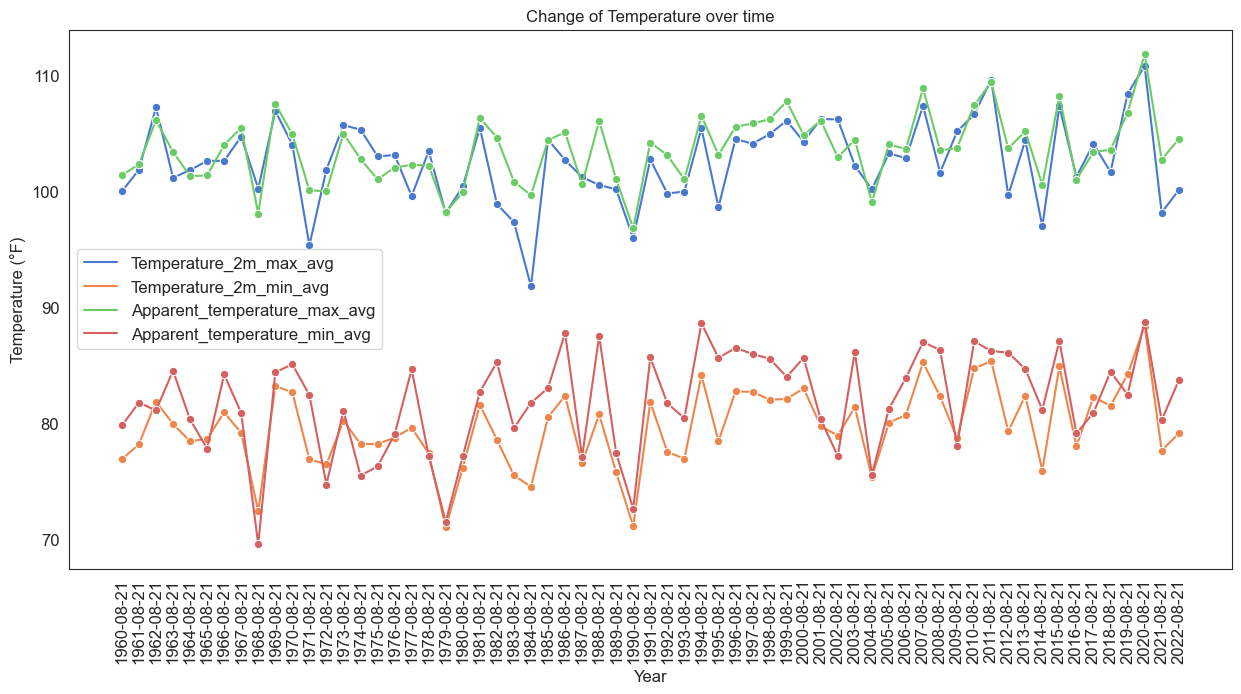

In [40]:
# enter your code here
import warnings
warnings.filterwarnings('ignore')
#Visualization showing the change of temperature over time
plt.figure(figsize =(15, 7))
temp = df[['Date','Temperature_2m_max_avg','Temperature_2m_min_avg','Apparent_temperature_max_avg','Apparent_temperature_min_avg']]
sns.lineplot(data = pd.melt(temp, ['Date']), x = 'Date', y = 'value', hue = 'variable', marker='o')
plt.title('Change of Temperature over time', fontsize = 12)
plt.xlabel('Year',fontsize =12)
plt.ylabel('Temperature (°F)',fontsize =12)
plt.legend(title = 'Temperature measurements')
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

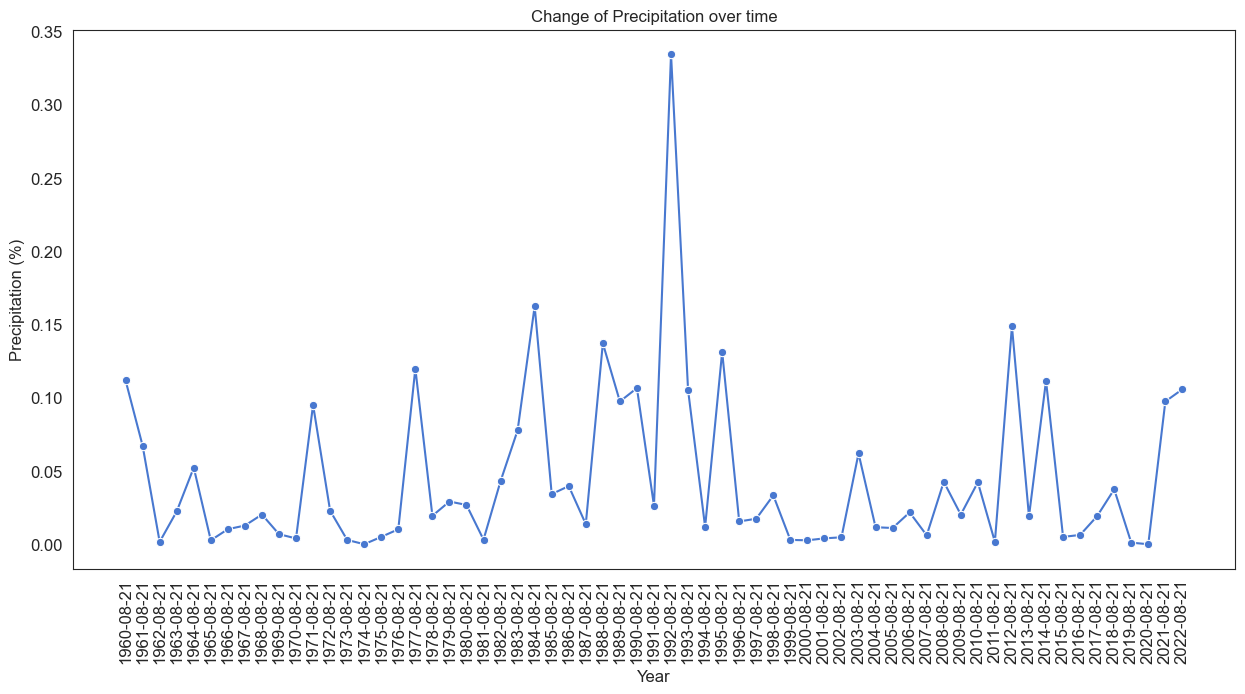

In [41]:
#Visualization showing the change of precipitation over time
plt.figure(figsize =(15, 7))

sns.lineplot(data = df, x = 'Date', y = 'Precipitation_sum_avg', marker='o')
plt.title('Change of Precipitation over time', fontsize = 12)
plt.xlabel('Year',fontsize = 12)
plt.ylabel('Precipitation (%)',fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

### Results Summary:

The plot 'Change of Temperature over time' shows that the the maximum daily air temperature at 2 meters above ground and maximum daily apparent temperature seems to have been maintained between 95°F and 110 °F whereas the minimum daily air temperature at 2 meters above ground and maximum daily apparent temperature has been maintained between 70°F and 85°F. A steep decrease in temperature has been observed in the year 1984 to 95 °F where a sharp surge has been observed in the year 2020 at a temperature of 112°F. 

The plot 'Change of Precipitation over time' shows that the the precipitation has been maintained between 0 - 15%. During the year 1992, the precipitation has been observed to increase upto 35%.
